Data Loading

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv("Dataset/ai4i2020.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [160]:
import warnings

warnings.filterwarnings("ignore")

Preprocessing

In [161]:
df[df["Machine failure"] == 1] # Boolean masking

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [163]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [164]:
df.duplicated().sum()

np.int64(0)

In [165]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [166]:
df.shape

(10000, 14)

In [167]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [168]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [169]:
df.drop(columns=['UDI', 'Product ID'], inplace=True)

In [170]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


Feature Engineering

In [171]:
df['temperature_difference'] = df['Process temperature [K]'] - df['Air temperature [K]'] # A high ΔT is a much stronger indicator of internal heat stress and potential Heat Dissipation Failure (HDF) than just a high process temperature alone.

df['Mechanical Power [W]'] = np.round((df['Rotational speed [rpm]'] * df['Torque [Nm]'] * 2 * np.pi)/ 60, 4) # Power is a consolidated measure of machine workload

In [172]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temperature_difference,Mechanical Power [W]
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.5906
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.7227
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.3875
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.5047
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,4955.1294
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,5434.7040
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,5753.6175
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,7151.1026


In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.004930,2.000259,295.3000,298.3000,300.10000,301.5000,304.500
Process temperature [K],10000.0,310.005560,1.483734,305.7000,308.8000,310.10000,311.1000,313.800
Rotational speed [rpm],10000.0,1538.776100,179.284096,1168.0000,1423.0000,1503.00000,1612.0000,2886.000
Torque [Nm],10000.0,39.986910,9.968934,3.8000,33.2000,40.10000,46.8000,76.600
Tool wear [min],10000.0,107.951000,63.654147,0.0000,53.0000,108.00000,162.0000,253.000
Machine failure,10000.0,0.033900,0.180981,0.0000,0.0000,0.00000,0.0000,1.000
TWF,10000.0,0.004600,0.067671,0.0000,0.0000,0.00000,0.0000,1.000
HDF,10000.0,0.011500,0.106625,0.0000,0.0000,0.00000,0.0000,1.000
PWF,10000.0,0.009500,0.097009,0.0000,0.0000,0.00000,0.0000,1.000
OSF,10000.0,0.009800,0.098514,0.0000,0.0000,0.00000,0.0000,1.000


E.D.A

Plotting the distribution of machine types

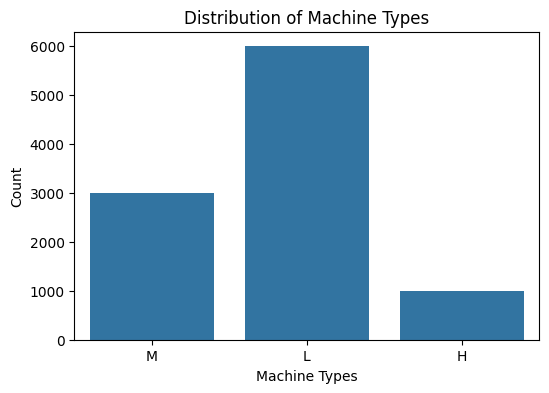

In [174]:
plt.figure(figsize=(6,4))
sns.countplot(x="Type", data = df)
plt.title("Distribution of Machine Types")
plt.xlabel("Machine Types")
plt.ylabel("Count")
plt.show()

Visualizing failure distribution among product types

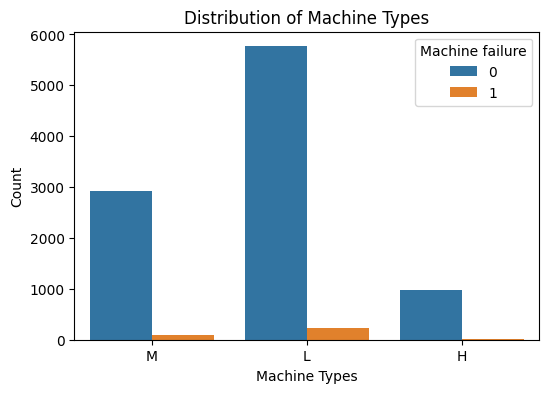

In [175]:
plt.figure(figsize=(6,4))
sns.countplot(x="Type", hue= "Machine failure", data = df)
plt.title("Distribution of Machine Types")
plt.xlabel("Machine Types")
plt.ylabel("Count")
plt.show()

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
 12  temperature_difference   10000 non-null  float64
 13  Mechanical Power [W]     10000 non-null  float64
dtypes: float64(5), int64(8)

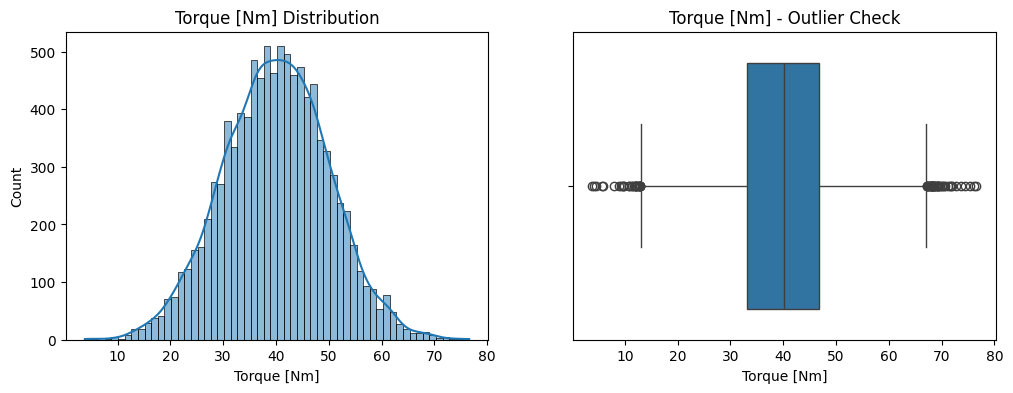

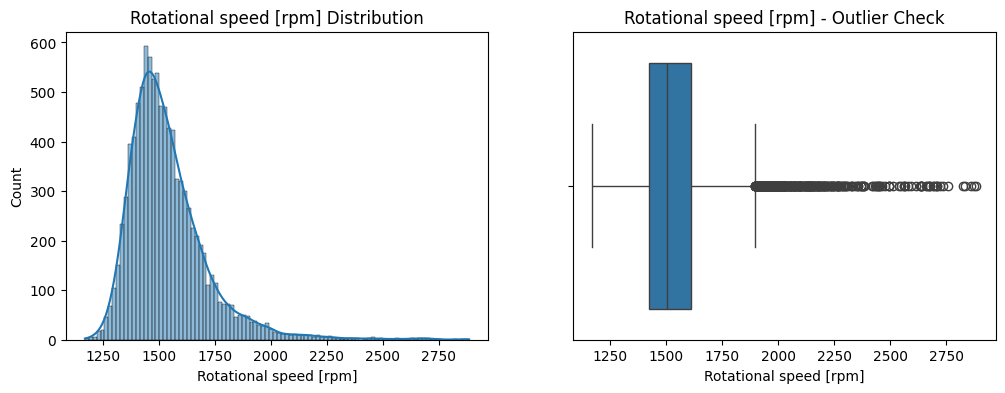

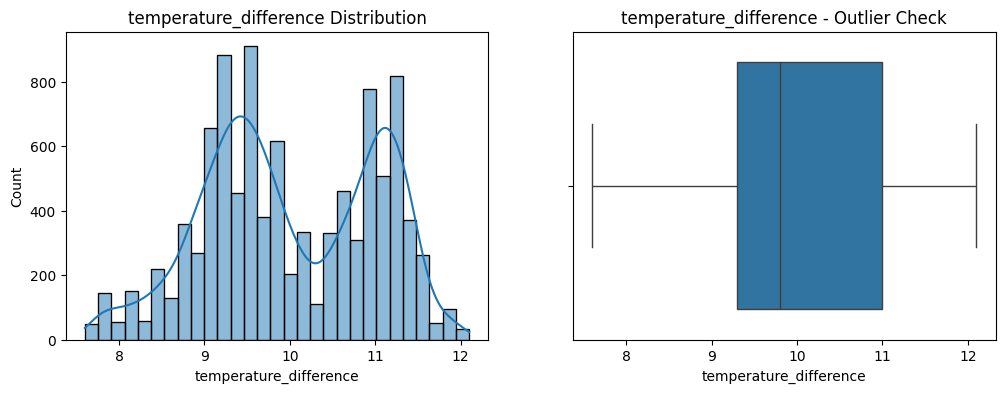

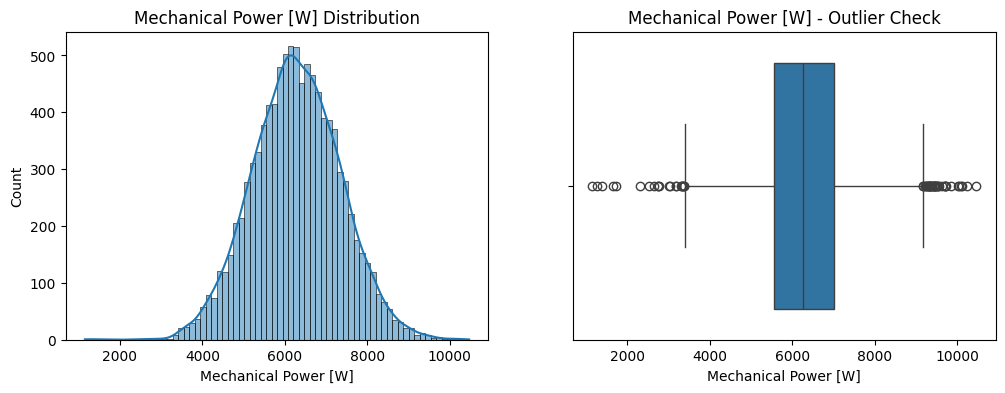

In [177]:
cols = ['Torque [Nm]', 'Rotational speed [rpm]', 'temperature_difference', 'Mechanical Power [W]']

for col in cols:

    fig, axes = plt.subplots(1,2 , figsize=(12,4)) # 1 row, 2 cols

    #histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    #boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

Pairplot for feature relationships

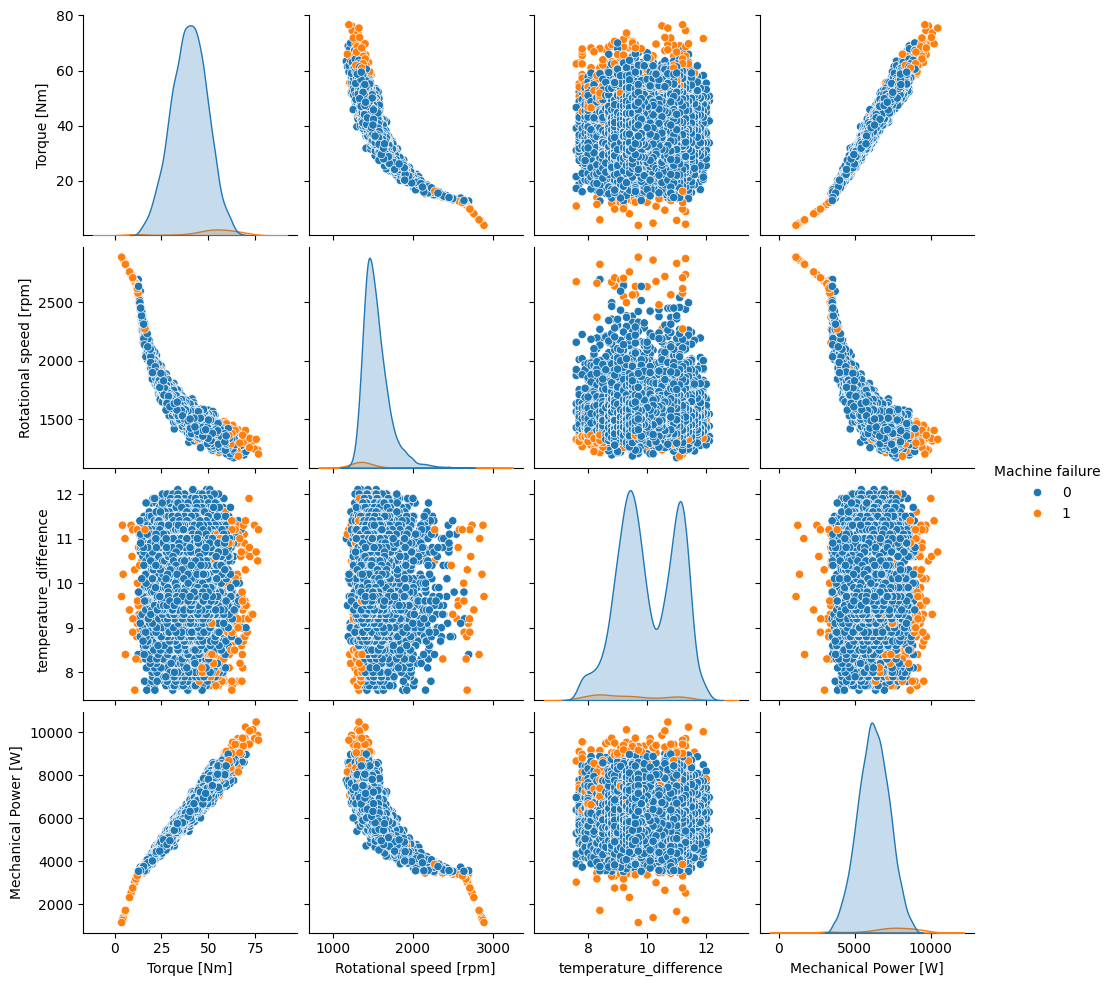

In [178]:
sns.pairplot(df[['Torque [Nm]', 'Rotational speed [rpm]', 'temperature_difference','Mechanical Power [W]', 'Machine failure']], hue='Machine failure')

correlation of features

<Axes: >

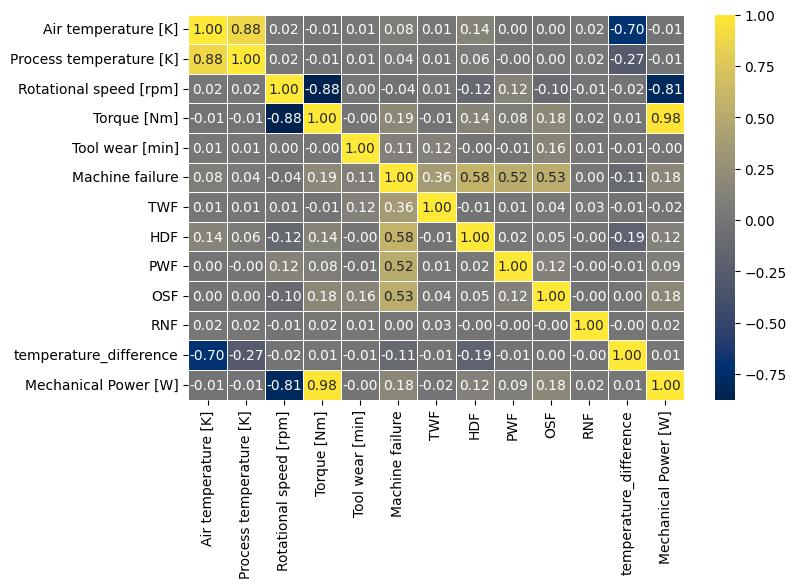

In [179]:
#checking correlation between numerical features using heatmap

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="cividis", fmt=".2f", linewidths =0.5)

Checking correlation between different failure flags using heatmap

<Axes: >

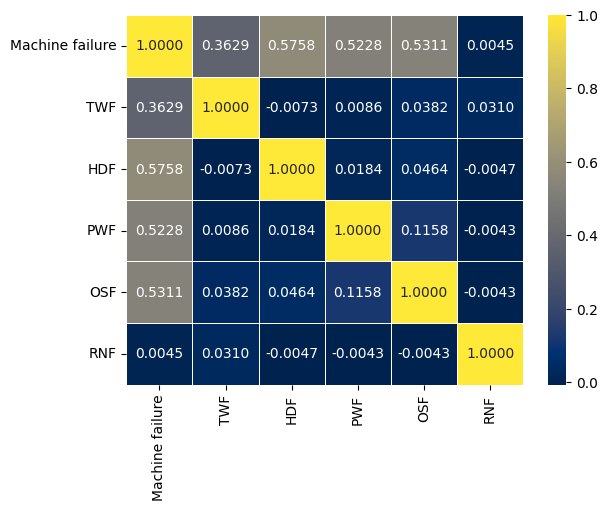

In [180]:
target = df.iloc[:, 6:12]
target_matrix = target.corr()
sns.heatmap(target_matrix, annot=True, cmap="cividis", fmt=".4f", linewidth=0.5)

The columns TWF, HDF, PWF, OSF, and RWF are specific outcome labels and must be dropped to prevent data leakage. We will train the model to predict the general Machine failure flag using only the physical sensor data.

In [181]:
df.drop(columns=['TWF','HDF','PWF','OSF','RNF'], inplace=True)

In [182]:
df.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
7898,L,300.8,312.5,1423,47.3,123,0,11.7,7048.4668
3174,L,300.3,309.6,1600,34.6,177,0,9.3,5797.2856
8323,H,298.7,309.5,1453,40.4,108,0,10.8,6147.1753
5118,M,304.2,313.6,1512,33.4,146,0,9.4,5288.4314
9630,L,299.0,310.1,1583,35.8,142,0,11.1,5934.6151


Encoding categorical data i.e. Type column

In [183]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Machine failure"]) #Feature
y = df["Machine failure"] #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y, random_state = 42)

In [184]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# ohe.fit(X_train[['Type']])

In [185]:
# # Transform data into temporary dataframe
# train_encoded_cols = pd.DataFrame(
#     ohe.transform(X_train[['Type']]),
#     columns = ohe.get_feature_names_out(['Type']), # name the columns
#     index = X_train.index #keep index aligned
# )

# X_train = pd.concat([X_train.drop('Type', axis = 1), train_encoded_cols], axis = 1)

# #Same for test set
# test_encoded_cols = pd.DataFrame(
#     ohe.transform(X_test[['Type']]),
#     columns = ohe.get_feature_names_out(['Type']), # name the columns
#     index = X_test.index #keep index aligned
# )

# X_test = pd.concat([X_test.drop('Type', axis = 1), test_encoded_cols], axis = 1)

In [186]:
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],temperature_difference,Mechanical Power [W]
4058,M,302.0,310.9,1456,47.2,54,8.9,7196.6767
1221,M,297.0,308.3,1399,46.4,132,11.3,6797.7363
6895,M,301.0,311.6,1357,45.6,137,10.6,6479.9747
9863,L,298.9,309.8,1411,56.3,84,10.9,8318.8640
8711,L,297.1,308.5,1733,28.7,50,11.4,5208.4569
...,...,...,...,...,...,...,...,...
980,L,296.1,306.7,1409,42.8,134,10.6,6315.1458
4266,L,302.7,311.1,1440,39.5,146,8.4,5956.4597
7772,H,300.3,311.5,1464,41.0,29,11.2,6285.6986
5780,L,301.7,311.2,1517,42.4,113,9.5,6735.6584


Better and cleaner way to do the above is by using column transformers

In [187]:
print(X_train.columns.to_list())

['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'temperature_difference', 'Mechanical Power [W]']


In [188]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'temperature_difference', 'Mechanical Power [W]']
cat_cols = ['Type']

preprocessing = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
    ]
)

X_train = pd.DataFrame(preprocessing.fit_transform(X_train), columns = preprocessing.get_feature_names_out(), index = X_train.index)
X_test = pd.DataFrame(preprocessing.transform(X_test), columns = preprocessing.get_feature_names_out(), index = X_test.index)

In [189]:
X_train

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__temperature_difference,num__Mechanical Power [W],cat__Type_H,cat__Type_L,cat__Type_M
4058,0.998914,0.604282,-0.460607,0.718305,-0.843997,-1.100842,0.852387,0.0,0.0,1.0
1221,-1.505194,-1.153260,-0.775574,0.638456,0.382263,1.299658,0.480363,0.0,0.0,1.0
6895,0.498092,1.077466,-1.007654,0.558607,0.460870,0.599512,0.184041,0.0,0.0,1.0
9863,-0.553633,-0.139294,-0.709265,1.626586,-0.372359,0.899575,1.898861,0.0,1.0,0.0
8711,-1.455112,-1.018064,1.070019,-1.128202,-0.906882,1.399679,-1.001687,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
980,-1.955933,-2.234824,-0.720317,0.279136,0.413706,0.599512,0.030333,0.0,1.0,0.0
4266,1.349489,0.739477,-0.549019,-0.050241,0.602361,-1.600946,-0.304152,0.0,1.0,0.0
7772,0.147517,1.009868,-0.416402,0.099476,-1.237029,1.199637,0.002873,1.0,0.0,0.0
5780,0.848667,0.807075,-0.123538,0.239211,0.083559,-0.500717,0.422474,0.0,1.0,0.0


In [190]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [191]:
X_train = X_train.values
X_test = X_test.values

Applying SMOTE for imbalanced class data

In [192]:
# Printing the distribution of class first

from collections import Counter

count = Counter(y_train)
count

Counter({0: 7729, 1: 271})

In [193]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [194]:
# Class distribution after SMOTE

count = Counter(y_train_smote)
count

Counter({0: 7729, 1: 7729})

Testing various classification algorithms for best accuracy

In [195]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [196]:
# Define a single random state for consistency
RANDOM_STATE = 42

models = {
    # --- LINEAR MODELS ---
    'Logistic Regression' : LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'Logistic Regression CV' : LogisticRegressionCV(random_state=RANDOM_STATE, max_iter=1000),
    'SGD' : SGDClassifier(random_state=RANDOM_STATE),

    # --- TREE/ENSEMBLE MODELS ---
    'Decision Tree' : DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Random Forest' : RandomForestClassifier(random_state=RANDOM_STATE),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=RANDOM_STATE),
    'Ada Boost' : AdaBoostClassifier(random_state=RANDOM_STATE),
    'Bagging' : BaggingClassifier(random_state=RANDOM_STATE),
    'XGBoost' : XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=RANDOM_STATE
    ),
    
    # --- DISTANCE-BASED MODELS ---
    'SVM' : SVC(random_state=RANDOM_STATE),
    'K-NN' : KNeighborsClassifier() # K-NN has no random state
}

In [197]:
# Function to evaluate all the models

def evaluate_model(X_train_smote, y_train_smote, X_test, y_test, models):

    result = []

    for name, model in models.items():

        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result.append((name, accuracy))
    
    # Sort models by accuracy

    result.sort(key = lambda x : x[1], reverse = True)
    
    return result


In [198]:
results = evaluate_model(X_train_smote, y_train_smote, X_test, y_test, models)

print("Model Performance:\n")
for name, accuracy in results:
    print(f"{name} : {accuracy: .6f}")

Model Performance:

Random Forest :  0.979000
XGBoost :  0.979000
Bagging :  0.976000
Decision Tree :  0.967500
Gradient Boosting :  0.951500
K-NN :  0.939500
SVM :  0.926500
Ada Boost :  0.912500
Logistic Regression CV :  0.863000
Logistic Regression :  0.860000
SGD :  0.841500


Why Accuracy is Insufficient for Imbalanced Data:

Even though we used SMOTE, the original problem had a huge imbalance (few failures). Accuracy can be highly misleading in this scenario.

- Example: If 99% of your test set are No Failures (0), a model that simply predicts 0 every single time will still have 99% accuracy. This high accuracy is useless because the model missed all the actual failures.

For a machine failure problem, the cost of a False Negative (Failing to predict a failure when one occurs) is usually much higher than a False Positive (Predicting a failure when none occurs).

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_model_robust(X_train_smote, y_train_smote, X_test, y_test, models):

    result = []

    print("Starting model training and evaluation.....")
    print("-" * 50)

    for name, model in models.items():

        try:

            model.fit(X_train_smote, y_train_smote)

            y_pred = model.predict(X_test)

            # Get probabilities( Needed for ROC AUC )
            # Some models (like SVC and SGD) don't output probability by default.

            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_test)[:, 1] #Probability of positive class (1)
            elif hasattr(model, "decision_function"):
                y_proba = model.decision_function(X_test) # Use decision function for models like SVC/SGD when probability = False
            else:
                y_proba = None # Cannot calculate AUC for this model easily
            
            # Calculate Metrics

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

            # Results

            result.append(
                {
                    'Model' : name,
                    'Accuracy' : round(acc, 4),
                    'Precision' : round(prec, 4),
                    'Recall' : round(rec, 4),
                    'F1 Score' : round(f1, 4),
                    'ROC AUC' : round(auc, 4) if auc != 'N/A' else 'N/A'
                }
            )
            
            print(f"{name} trained and evaluated successfully.")
        
        except Exception as e:

            print(f"Error training {name} : {e}")
            result.append({'Model' : name, 'Error' : e})
    
    # Convert list of results to DataFrame for clean comparision

    result_df = pd.DataFrame(result)

    # Sort by the most important metric (ROC AUC or F1 Score)
    # Since ROC AUC is generally the best single metric for ranking models, let's use it.

    result_df = result_df.sort_values(by = 'ROC AUC', ascending = False)

    return result_df

In [200]:
final_result = evaluate_model_robust(X_train_smote, y_train_smote, X_test, y_test, models)

print("Model comparision results:\n")
print(final_result)

Starting model training and evaluation.....
--------------------------------------------------
Logistic Regression trained and evaluated successfully.
Logistic Regression CV trained and evaluated successfully.
SGD trained and evaluated successfully.
Decision Tree trained and evaluated successfully.
Random Forest trained and evaluated successfully.
Gradient Boosting trained and evaluated successfully.
Ada Boost trained and evaluated successfully.
Bagging trained and evaluated successfully.
XGBoost trained and evaluated successfully.
SVM trained and evaluated successfully.
K-NN trained and evaluated successfully.
Model comparision results:

                     Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
8                  XGBoost    0.9790     0.6477  0.8382    0.7308   0.9824
5        Gradient Boosting    0.9515     0.4052  0.9118    0.5611   0.9777
9                      SVM    0.9265     0.3054  0.9118    0.4576   0.9736
4            Random Forest    0.9790     0.6585  0.79